In [1]:
import warnings
warnings.filterwarnings('ignore')
from Functions import *


# Importar datos

In [2]:
df = pd.read_csv('card_transdata.csv', sep=',')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Exploracion de datos

1. **Ausencia de valores nulos y filas duplicadas:**  
   El conjunto de datos no presenta valores nulos ni duplicados, lo que asegura que no se requiere un procesamiento adicional para el manejo de estos aspectos.

2. **Desbalance en la variable objetivo (Fraud):**  
   La variable objetivo, que indica la presencia de fraude, se encuentra desbalanceada, con una menor representación de los casos de fraude en comparación con los no fraudes. Esto sugiere que será necesario aplicar técnicas de balanceo de clases para mejorar el rendimiento de los modelos predictivos.

3. **Valores atípicos en las variables numéricas:**  
   Se detecta la presencia de valores atípicos (outliers) en varias de las variables numéricas. Al analizar estos outliers, se observa que muchos corresponden a transacciones fraudulentas. Este comportamiento es esperable, ya que los fraudes suelen estar asociados a transacciones inusuales o anómalas.

4. **Ausencia de valores negativos:**  
   No se encontraron valores negativos en las variables numéricas, lo que es coherente con el contexto del análisis de transacciones financieras.

5. **Correlación entre las variables explicativas:**  
   El análisis de la matriz de correlación muestra que no existe una correlación significativa entre las variables explicativas. Sin embargo, se destaca una fuerte correlación entre la variable **`ratio_to_median_purchase_price`** y la variable objetivo (fraude), lo que indica que esta característica podría ser un predictor clave en la identificación de transacciones fraudulentas.

In [3]:
#Numero de filas y columnas
df.shape

(1000000, 8)

In [4]:
#Valores nulos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Numero de duplicados
df.duplicated().sum()

0

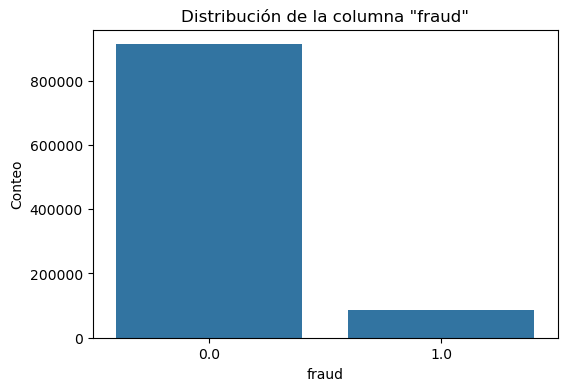

In [7]:
#Balance variable target
plot_target_balance(df, 'fraud')

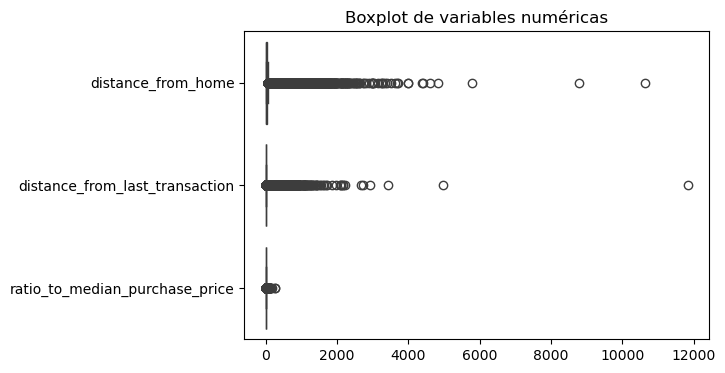

In [8]:
#Busqueda de valores atípicos en las variables numéricas
numerical_columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
plot_outliers(df, numerical_columns)

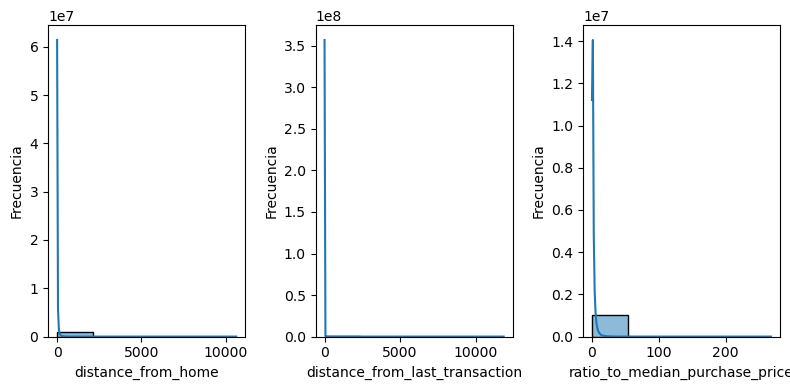

In [9]:
#Distribucion de variables numéricas
plot_numerical_distribution(df, numerical_columns, bins=5)

In [10]:
# Numeros de fraudes en outliers de las variables

In [11]:
report_fraud_in_outliers(df, 'distance_from_home', 'fraud')

Número de fraudes entre los outliers de distance_from_home: 25721.0
Porcentaje de fraudes entre los outliers de distance_from_home: 24.82%


In [12]:
report_fraud_in_outliers(df, 'distance_from_last_transaction', 'fraud')

Número de fraudes entre los outliers de distance_from_last_transaction: 15967.0
Porcentaje de fraudes entre los outliers de distance_from_last_transaction: 12.84%


In [13]:
report_fraud_in_outliers(df, 'ratio_to_median_purchase_price', 'fraud')

Número de fraudes entre los outliers de ratio_to_median_purchase_price: 53092.0
Porcentaje de fraudes entre los outliers de ratio_to_median_purchase_price: 62.92%


In [14]:
# Ver valores negativos en la variables numericas
count_negative_values(df, numerical_columns)

Número de valores menores a cero en distance_from_home: 0
Número de valores menores a cero en distance_from_last_transaction: 0
Número de valores menores a cero en ratio_to_median_purchase_price: 0


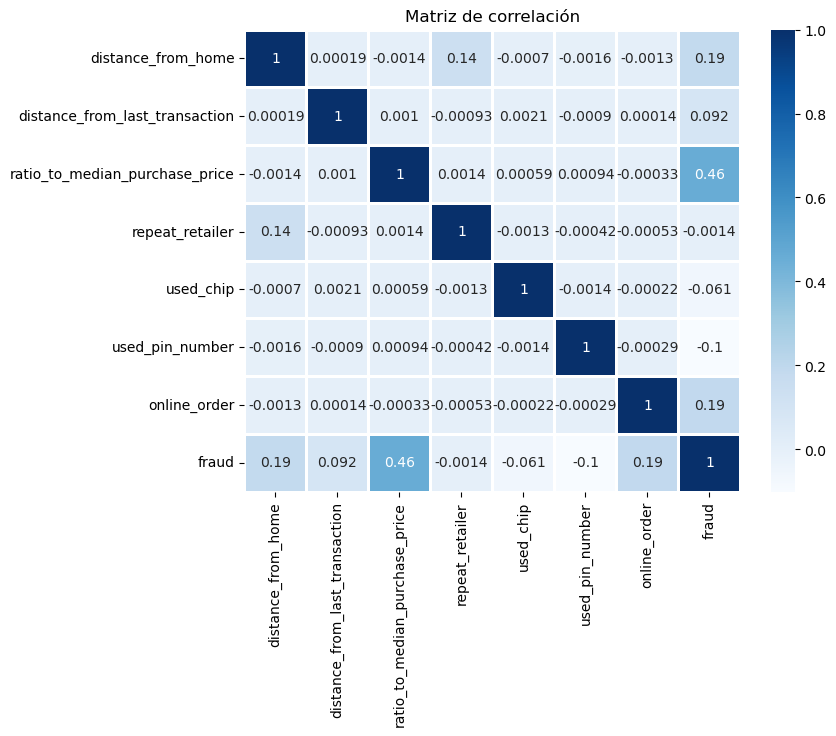

In [15]:
# Matriz de correlación de la variables
plot_correlation_matrix(df)

# Limpieza de datos

- Se formatearon las variables numéricas a categóricas.

**Importante:**  
Cabe mencionar que, a pesar de la presencia de valores atípicos, **no se ha aplicado tratamiento a estos datos**. Esto se debe a que muchos de los valores atípicos corresponden a transacciones fraudulentas, lo cual es coherente con la naturaleza de los fraudes. Eliminar estos valores implicaría **perder información valiosa** que podría ser crucial para la detección de fraudes.


In [16]:
#Formateo de tipos de datos
# Variables categoricas 
# ( floats a integers)
int_columns = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
df[int_columns] = df[int_columns].astype(int)
# ( integers a categories)
categoricas = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order', 'fraud']
df[categoricas] = df[categoricas].astype('category')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype   
---  ------                          --------------    -----   
 0   distance_from_home              1000000 non-null  float64 
 1   distance_from_last_transaction  1000000 non-null  float64 
 2   ratio_to_median_purchase_price  1000000 non-null  float64 
 3   repeat_retailer                 1000000 non-null  category
 4   used_chip                       1000000 non-null  category
 5   used_pin_number                 1000000 non-null  category
 6   online_order                    1000000 non-null  category
 7   fraud                           1000000 non-null  category
dtypes: category(5), float64(3)
memory usage: 27.7 MB


# Feature engineering

- Las variables categóricas fueron transformadas a variables dummy utilizando *One-Hot Encoding*.

- El conjunto de datos se dividió en un 80% para entrenamiento y 20% para prueba.

- Se escalaron las características en los conjuntos de entrenamiento y prueba. Se utilizó *RobustScaler* debido a la presencia de valores atípicos en el conjunto de datos y a la importancia de mantener estos valores.

- Se implementó un método de *undersampling* para equilibrar el desbalance en la variable objetivo.


In [18]:
#Creacion de variables dummies
df_withdummy = pd.get_dummies(df, columns=['repeat_retailer', 'used_chip','used_pin_number', 'online_order'])
df_withdummy.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud,repeat_retailer_0,repeat_retailer_1,used_chip_0,used_chip_1,used_pin_number_0,used_pin_number_1,online_order_0,online_order_1
0,57.877857,0.311140,1.945940,0,False,True,False,True,True,False,True,False
1,10.829943,0.175592,1.294219,0,False,True,True,False,True,False,True,False
2,5.091079,0.805153,0.427715,0,False,True,True,False,True,False,False,True
3,2.247564,5.600044,0.362663,0,False,True,False,True,True,False,False,True
4,44.190936,0.566486,2.222767,0,False,True,False,True,True,False,False,True


In [19]:
#Creación de Feautures and target
features= df_withdummy.drop(['fraud'], axis=1)
target = df_withdummy['fraud']

In [20]:
#Creacion de conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=123)

In [21]:
# Escalar con RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [22]:
# Aplicar Undersampling
rus = RandomUnderSampler(random_state=123)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

# Hiperparametros



Hiperparametros Regresión Logística

In [23]:
# Definir el modelo de regresión logística
logic= LogisticRegression()
grid_logic = {
    'C': [0.001, 0.01, 0.1, 1],  # Usar valores más bajos para C
    'penalty': ['l1','l2'],  # Preferir L1 para lidiar con outliers
    'solver': ['liblinear', 'saga']  # Solucionadores compatibles
}
model_logic = GridSearchCV(estimator=logic, param_grid=grid_logic,
                           cv=3)
model_logic.fit(X_train_resampled, y_train_resampled)  

best_model = model_logic.best_estimator_
model_logic.best_estimator_


LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

Hiperparametros arbol de decisión

In [24]:
tree = DecisionTreeClassifier(random_state=123)
grid_tree = {
    'max_depth': [3, 5, 10, 15],  # Profundidad del árbol, limitar para evitar sobreajuste
    'min_samples_split': [2, 10, 20],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [5, 10, 15],  # Número mínimo de muestras por nodo hoja

}

model_tree = GridSearchCV(estimator=tree, param_grid=grid_tree, cv=3)

model_tree.fit(X_train_resampled, y_train_resampled)

best_tree_model = model_tree.best_estimator_
model_tree.best_estimator_


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

Hiperparametros Random Forest

In [25]:
forest = RandomForestClassifier(random_state=123)

grid_forest = {
    'n_estimators': [50, 100],  # Reducir a un número razonable de árboles
    'max_depth': [5, 10],  # Limitar la profundidad del árbol para evitar sobreajuste
    'min_samples_split': [10, 20],  # Limitar el mínimo de muestras para dividir un nodo
    'min_samples_leaf': [5, 10],  # Similar para los nodos hoja
    'bootstrap': [True]  # Usar Bootstrap (muestreo con reemplazo)
}

model_forest = GridSearchCV(estimator=forest, param_grid=grid_forest, cv=3)

model_forest.fit(X_train_resampled, y_train_resampled)

best_forest_model = model_forest.best_estimator_
model_forest.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, random_state=123)

Hiperparametros Gradient Boosting

In [26]:
gb = GradientBoostingClassifier(random_state=123)

grid_gb = {
    'n_estimators': [50, 100],  # Reducir el número de árboles a un rango más manejable
    'max_depth': [3, 5],  # Limitar la profundidad del árbol para evitar sobreajuste
    'min_samples_split': [10, 20],  # Limitar para evitar sobreajuste y ajustar a tamaño de los datos
}

model_gb = GridSearchCV(estimator=gb, param_grid=grid_gb, cv=3)

model_gb.fit(X_train_resampled, y_train_resampled)

best_gb_model = model_gb.best_estimator_
model_gb.best_estimator_

GradientBoostingClassifier(max_depth=5, min_samples_split=10, random_state=123)

# Modelado

**Modelo Regresión Logística**

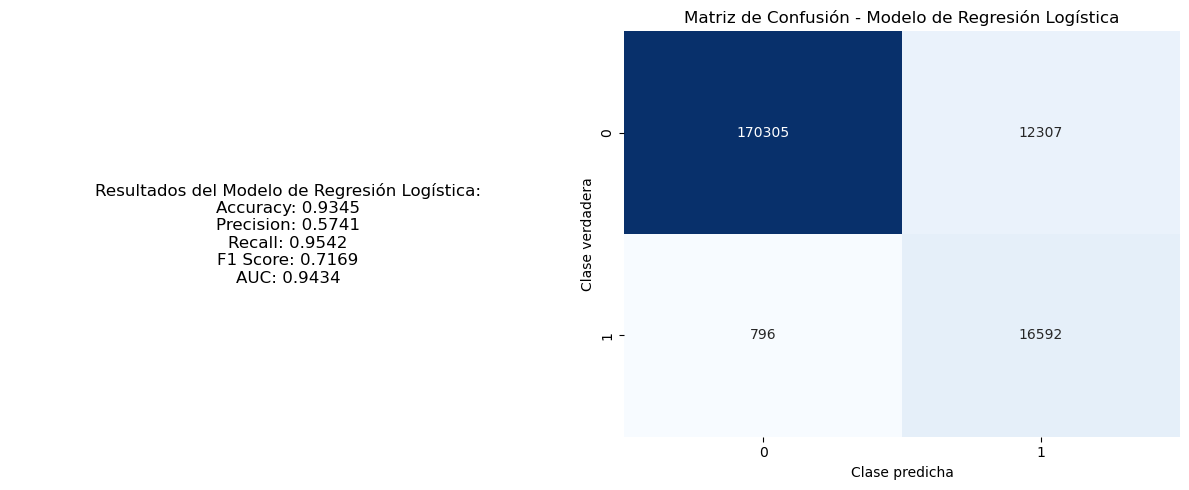

In [37]:
evaluate_model_with_confusion(model_logic, X_test_scaled, y_test, model_name="Modelo de Regresión Logística")

Variables de importancia en Regresión Logística

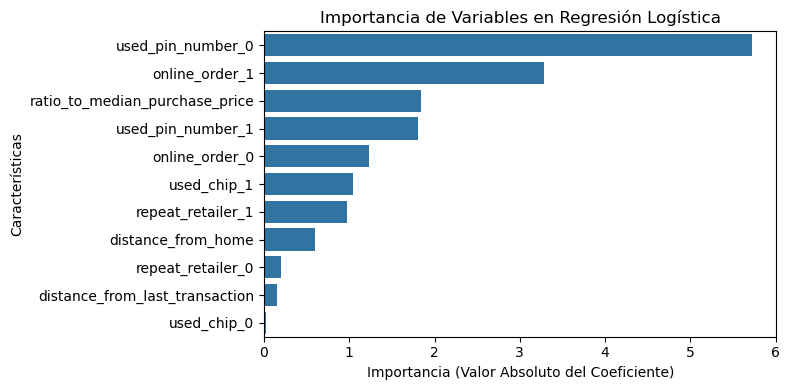

In [29]:
# Obtener los coeficientes del modelo de regresión logística
coef_importance = pd.Series(np.abs(best_model.coef_[0]), index=X_train_resampled.columns)
coef_importance.sort_values(ascending=False, inplace=True)

# Crear gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x=coef_importance.values, y=coef_importance.index)

# Añadir título y etiquetas
plt.title("Importancia de Variables en Regresión Logística")
plt.xlabel("Importancia (Valor Absoluto del Coeficiente)")
plt.ylabel("Características")

# Mostrar gráfico
plt.tight_layout()
plt.show()

**Modelo Arbol de Decision**

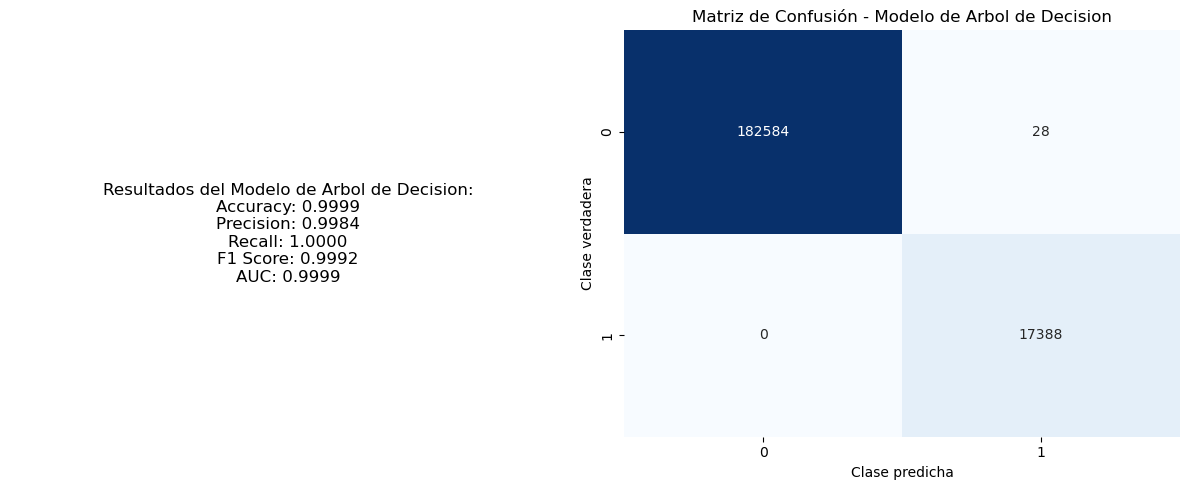

In [39]:
evaluate_model_with_confusion(model_tree, X_test_scaled, y_test, model_name="Modelo de Arbol de Decision")

Variables de importancia en árbol de Decisión

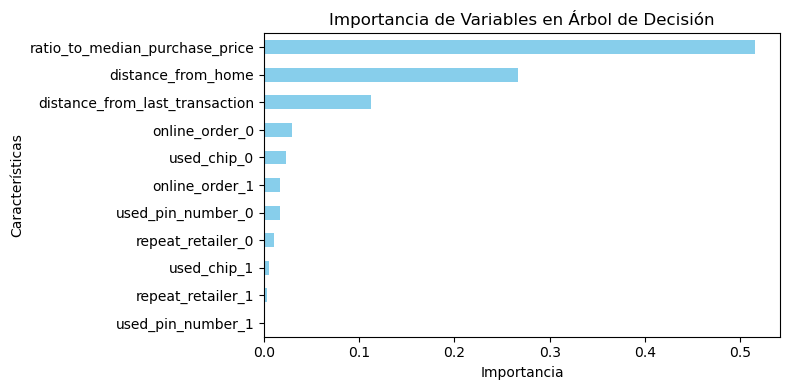

In [31]:
# Árbol de Decisión
tree_importance = pd.Series(best_tree_model.feature_importances_, index=X_train_resampled.columns)
tree_importance.sort_values(ascending=True, inplace=True)

# Graficar la importancia de las variables en Árbol de Decisión (horizontal)
plt.figure(figsize=(8, 4))
tree_importance.plot(kind='barh', color='skyblue')
plt.title("Importancia de Variables en Árbol de Decisión")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

**Modelo Random Forest**

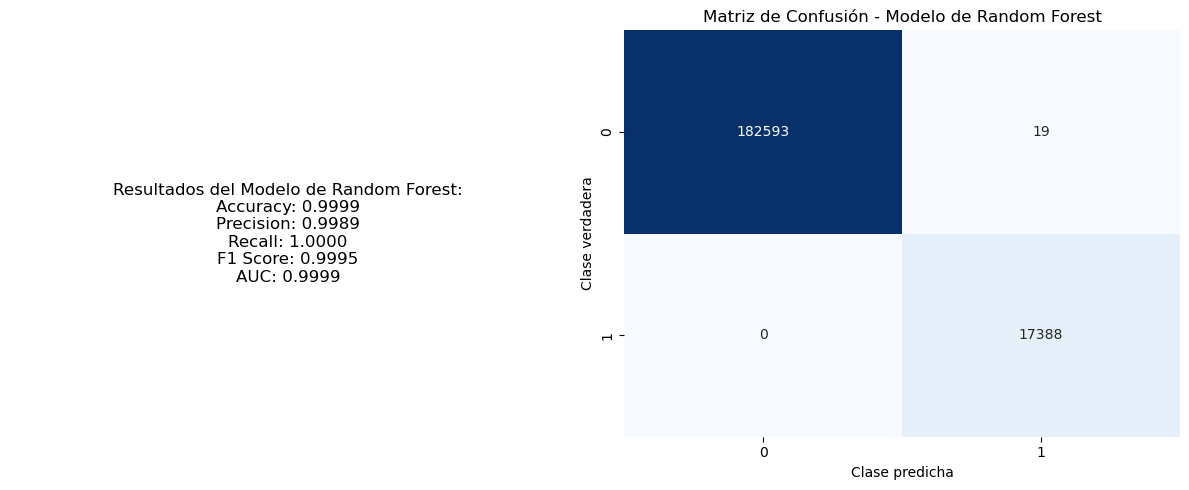

In [40]:
evaluate_model_with_confusion(model_forest, X_test_scaled, y_test, model_name="Modelo de Random Forest")

Variables de importancia en Random Forest

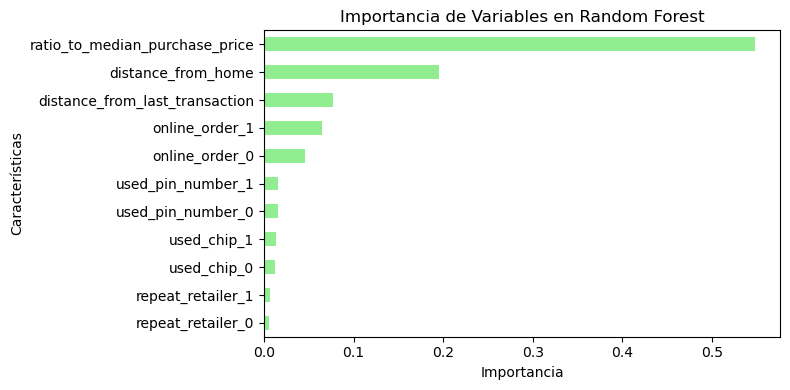

In [33]:
# Random Forest
rf_importance = pd.Series(best_forest_model.feature_importances_, index=X_train_resampled.columns)
rf_importance.sort_values(ascending=True, inplace=True)

# Graficar la importancia de las variables en Random Forest (horizontal)
plt.figure(figsize=(8, 4))
rf_importance.plot(kind='barh', color='lightgreen')
plt.title("Importancia de Variables en Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

**Modelo Gradient Boosting**

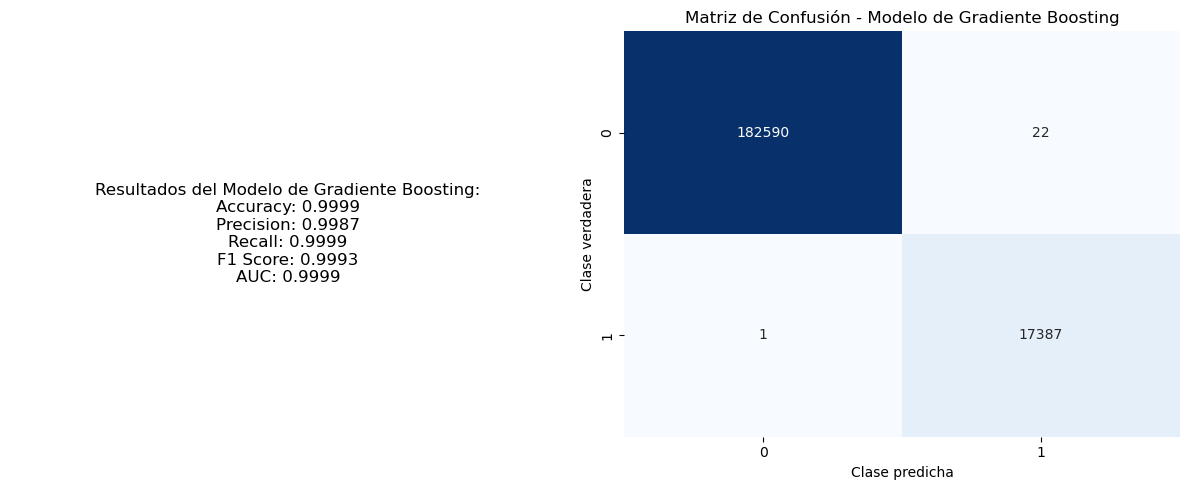

In [42]:
evaluate_model_with_confusion(model_gb, X_test_scaled, y_test, model_name="Modelo de Gradiente Boosting")

variable de importancia en Gradient Boosting

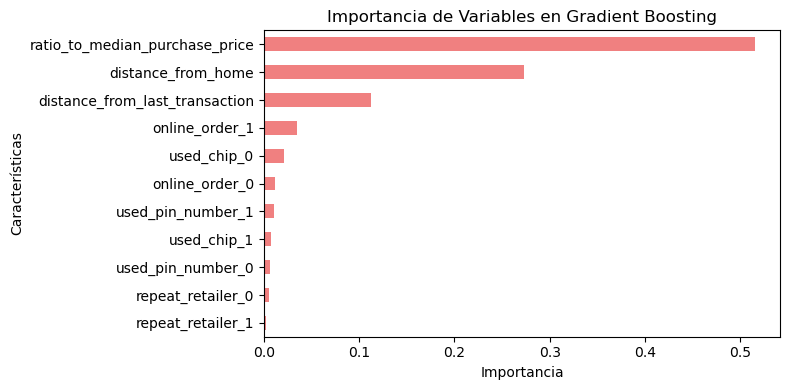

In [35]:
# Gradient Boosting
boost_importance = pd.Series(best_gb_model.feature_importances_, index=X_train_resampled.columns)
boost_importance.sort_values(ascending=True, inplace=True)

# Graficar la importancia de las variables en Gradient Boosting (horizontal)
plt.figure(figsize=(8, 4))
boost_importance.plot(kind='barh', color='lightcoral')
plt.title("Importancia de Variables en Gradient Boosting")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

## Comparación de modelos 

In [36]:
#Cuadro comparativo de métricas

metrics = {
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_logic, accuracy_tree, accuracy_rf, accuracy_boost],
    'Precision': [precision_logic, precision_tree, precision_rf, precision_boost],
    'Recall': [recall_logic, recall_tree, recall_rf, recall_boost],
    'F1 Score': [f1_logic, f1_tree, f1_rf, f1_boost],
    'AUC': [auc_logic, auc_tree, auc_rf, auc_boost]
}

df_metrics = pd.DataFrame(metrics)

df_metrics

,Modelo,Accuracy,Precision,Recall,F1 Score,AUC
0,Regresión Logística,0.934485,0.574138,0.954221,0.716918,0.943414
1,Árbol de Decisión,0.999860,0.998392,1.000000,0.999195,0.999923
2,Random Forest,0.999905,0.998908,1.000000,0.999454,0.999948
3,Gradient Boosting,0.999885,0.998736,0.999942,0.999339,0.999911
